In [2]:
import pandas as pd
import os

# Get all files in the current working directory
files = os.listdir()

print(files)
# Step 1: Identify Unique Proteins

proteins = set(file.split("_")[3] for file in files if len(file.split("_")) >= 4)

# Initialize an empty DataFrame for the final combined data
combined_df = pd.DataFrame()

# Step 2 & 3: Process each protein
for protein in proteins:
  # Initialize empty lists to store DataFrames for each type
  enrichment_metrics_dfs = []
  log_aucs_dfs = []
  roc_metrics_dfs = []

  # Filter files for the current protein and process according to type
  for file in files:
    if protein in file:
      if "enrichment_metrics" in file:
        enrichment_metrics_dfs.append(pd.read_csv(file))
      elif "log_aucs" in file:
        log_aucs_dfs.append(pd.read_csv(file))
      elif "roc_metrics" in file:
        roc_metrics_dfs.append(pd.read_csv(file))

  # Concatenate DataFrames of the same type
  enrichment_df = pd.concat(enrichment_metrics_dfs)
  log_aucs_df = pd.concat(log_aucs_dfs)
  roc_metrics_df = pd.concat(roc_metrics_dfs)

  # Step 4: Merge the three DataFrames for each protein
  merged_df = enrichment_df.merge(
    log_aucs_df, on=["Protein", "Strain Energy Cutoff"]
  ).merge(roc_metrics_df, on=["Protein", "Strain Energy Cutoff"])

  # Append to the final DataFrame
  combined_df = pd.concat([combined_df, merged_df], ignore_index=True)

# Resulting combined_df contains all data
display(combined_df)

# Save the final DataFrame to a CSV file
combined_df.to_csv("combined_data.csv", index=False)

data = combined_df

['strain_roc_metrics_OPRM.csv', 'strain_log_aucs_SMO.csv', 'strain_enrichment_metrics_S1PR1.csv', 'strain_log_aucs_MGLUR1.csv', 'strain_roc_metrics_OPRX.csv', 'strain_roc_metrics_OPRK.csv', 'strain_log_aucs_MGLUR5.csv', 'strain_roc_metrics_CCR5.csv', 'strain_log_aucs_CXCR4.csv', 'strain_log_aucs_CRFR1.csv', 'strain_roc_metrics_S1PR1.csv', 'strain_log_aucs_PAR1.csv', 'strain_log_aucs_OPRD.csv', 'strain_enrichment_metrics_MGLUR1.csv', 'strain_roc_metrics_GPR40.csv', 'strain_enrichment_metrics_P2Y12.csv', 'strain_enrichment_metrics_HRH1.csv', 'strain_log_aucs_AA2AR.csv', 'strain_enrichment_metrics_DRD3.csv', 'strain_roc_metrics_SMO.csv', 'strain_log_aucs_OX2R.csv', 'strain_log_aucs_ADRB2.csv', 'strain_enrichment_metrics_GPR40.csv', 'strain_roc_metrics_P2Y12.csv', 'strain_log_aucs_HRH1.csv', 'strain_enrichment_metrics_OX2R.csv', 'strain_log_aucs_DRD3.csv', 'strain_log_aucs_ADRB1.csv', 'strain_enrichment_metrics_OPRD.csv', 'strain_roc_metrics_ACM3.csv', 'strain_enrichment_metrics_MGLUR5.csv

,Protein,Strain Energy Cutoff,EF1%,EF5%,Linear Log10 AUC (x10),Delta Linear Log10 AUC (x10),ROC_AUC,Actives,Total Count
0,DRD3,No Cutoff,0.000000,0.836820,1.012564,0.000000,0.426173,239,15265
1,DRD3,4,0.000000,1.666667,1.062163,0.049599,0.424349,60,5079
2,DRD3,4.5,0.000000,2.702703,1.108910,0.096346,0.439641,74,5994
3,DRD3,5.0,0.000000,2.083333,1.082919,0.070356,0.432111,96,6966
4,DRD3,5.5,0.000000,0.909091,1.045312,0.032748,0.426455,110,7895
...,...,...,...,...,...,...,...,...,...
193,ADRB1,5.5,10.588235,25.882353,3.120177,0.590733,0.687175,85,3286
194,ADRB1,6.0,11.650485,25.242718,3.074755,0.545311,0.684143,103,4043
195,ADRB1,7.0,9.615385,21.153846,2.925952,0.396508,0.678560,156,5626
196,ADRB1,7.5,9.659091,20.454545,2.933909,0.404465,0.683270,176,6344


In [3]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load your dataset
# data = combined_df

# # Ensure 'Strain Energy Cutoff' is treated as a string to include "No Cutoff"
# data["Strain Energy Cutoff"] = data["Strain Energy Cutoff"].astype(str)

# # List of performance metrics to plot
# metrics = [
#     "EF1%",
#     "EF5%",
#     "Linear Log10 AUC (x10)",
#     "Delta Linear Log10 AUC (x10)",
#     "ROC_AUC",
# ]

# # Get a list of unique proteins in the dataset
# proteins = data["Protein"].unique()

# # Loop through each protein and generate plots
# for protein in proteins:
#     # Filter the dataset for the current protein
#     data_protein = data[data["Protein"] == protein]

#     # Setup the plot
#     plt.figure(figsize=(14, 10))

#     # Plot each metric
#     for i, metric in enumerate(metrics, start=1):
#         plt.subplot(3, 2, i)
#         sns.lineplot(
#             data=data_protein,
#             x="Strain Energy Cutoff",
#             y=metric,
#             marker="o",
#             sort=False,
#         )
#         plt.title(f"{metric} for {protein}")
#         plt.xticks(rotation=45)
#         plt.tight_layout()

#     # Adjust overall plot title
#     plt.suptitle(
#         f"Performance Metrics as a Function of Strain Energy Cutoff for {protein}",
#         fontsize=16,
#         y=1.05,
#     )

#     # Save the plot with a unique filename for each protein
#     plt.savefig(f"performance_metrics_{protein}.png")
#     plt.close()  # Close the plot to free memory

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/2249070293.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


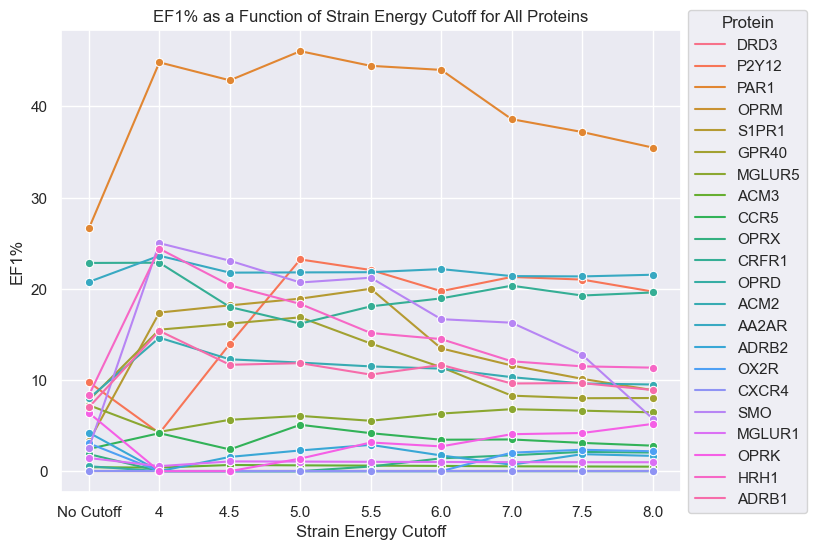

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")
# Plotting one performance metric ('EF1%') for all proteins and handling the large legend
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=data, x="Strain Energy Cutoff", y="EF1%", hue="Protein", marker="o", ci=None
)

# Title and labels
plt.title("EF1% as a Function of Strain Energy Cutoff for All Proteins")
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("EF1%")

# Handling the legend - placing it outside the plot
box = ax.get_position()
ax.set_position(
    [box.x0, box.y0, box.width * 0.8, box.height]
)  # Resize plot to make space for the legend
lgd = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/3340971315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF1%", hue="Protein", ci=None)


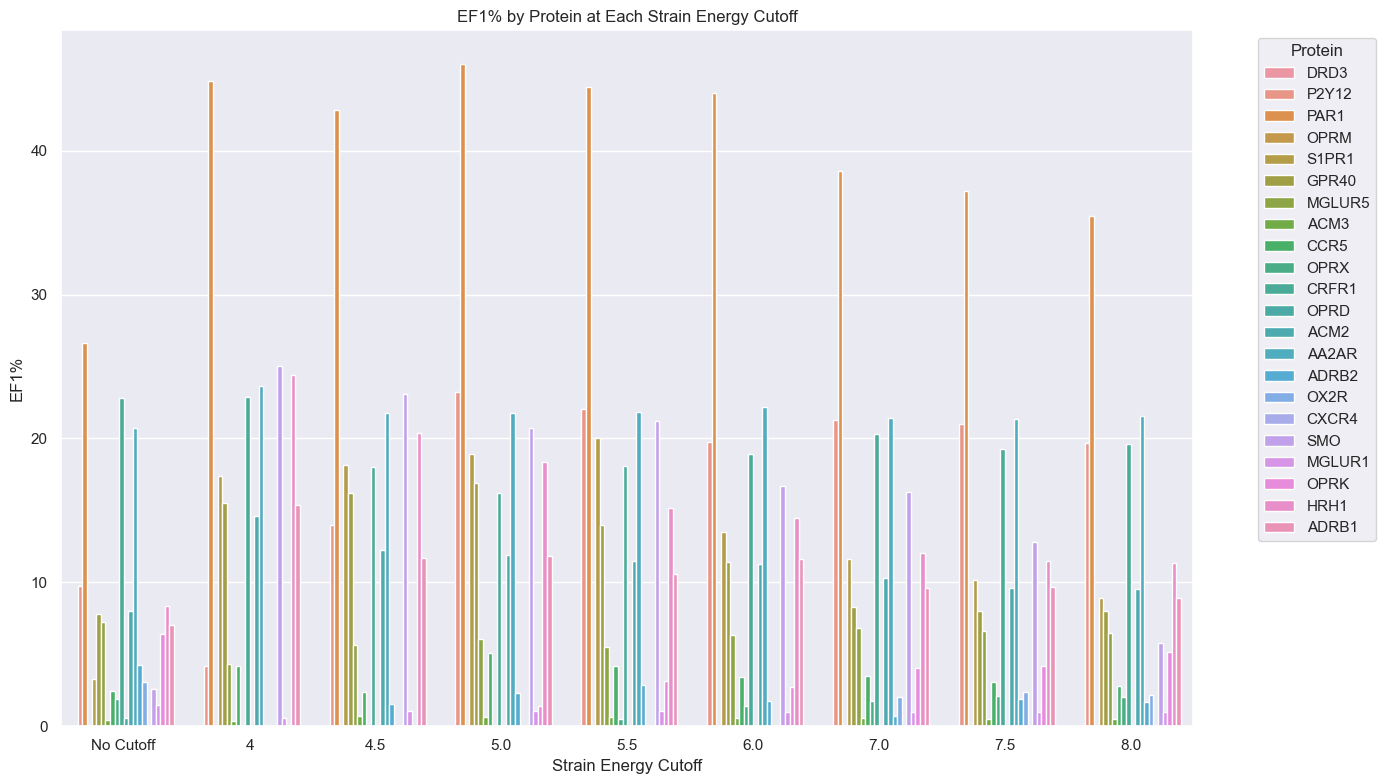

In [6]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF1%", hue="Protein", ci=None)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("EF1%")
plt.title("EF1% by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/1998993404.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF5%", hue="Protein", ci=None)


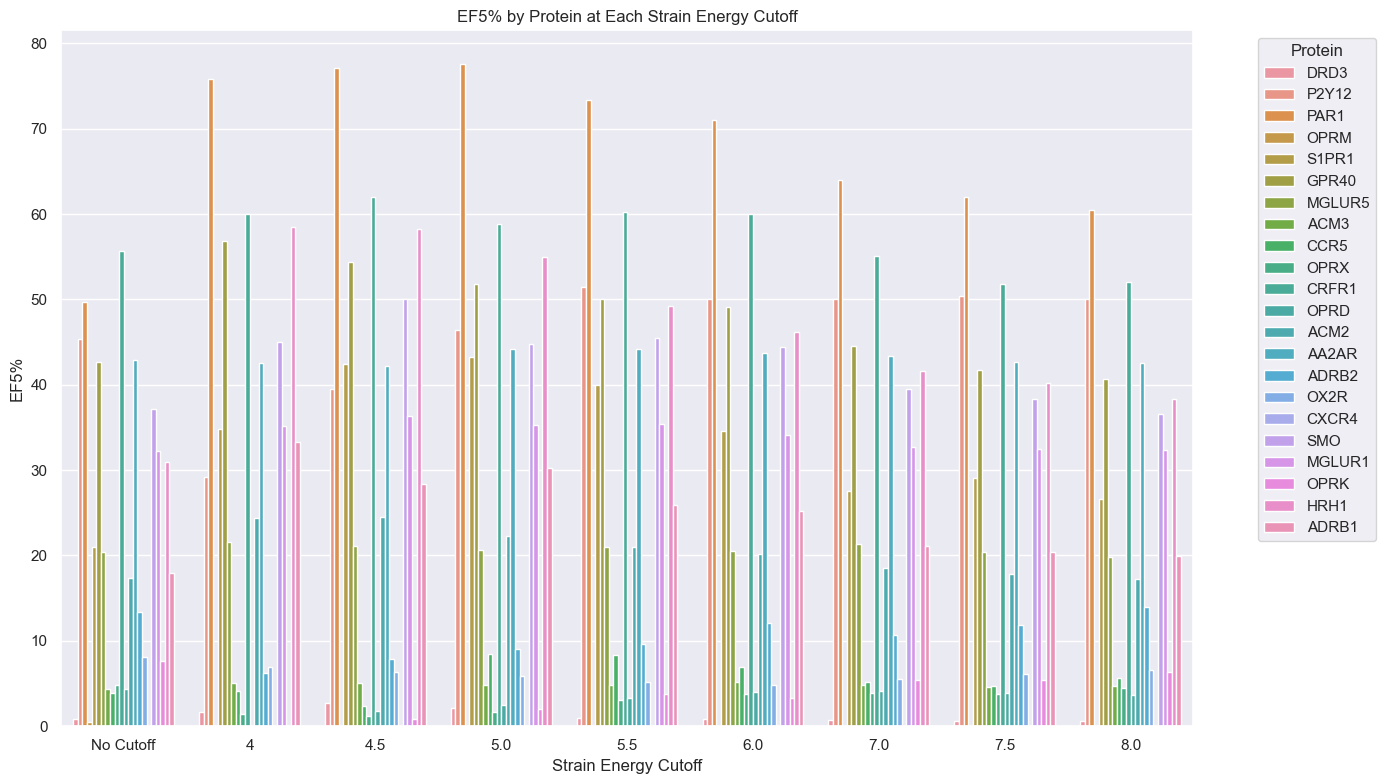

In [8]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(data=data, x="Strain Energy Cutoff", y="EF5%", hue="Protein", ci=None)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("EF5%")
plt.title("EF5% by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
data.columns

Index(['Protein', 'Strain Energy Cutoff', 'EF1%', 'EF5%',
       'Linear Log10 AUC (x10)', 'Delta Linear Log10 AUC (x10)', 'ROC_AUC',
       'Actives', 'Total Count'],
      dtype='object')

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/3592951368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


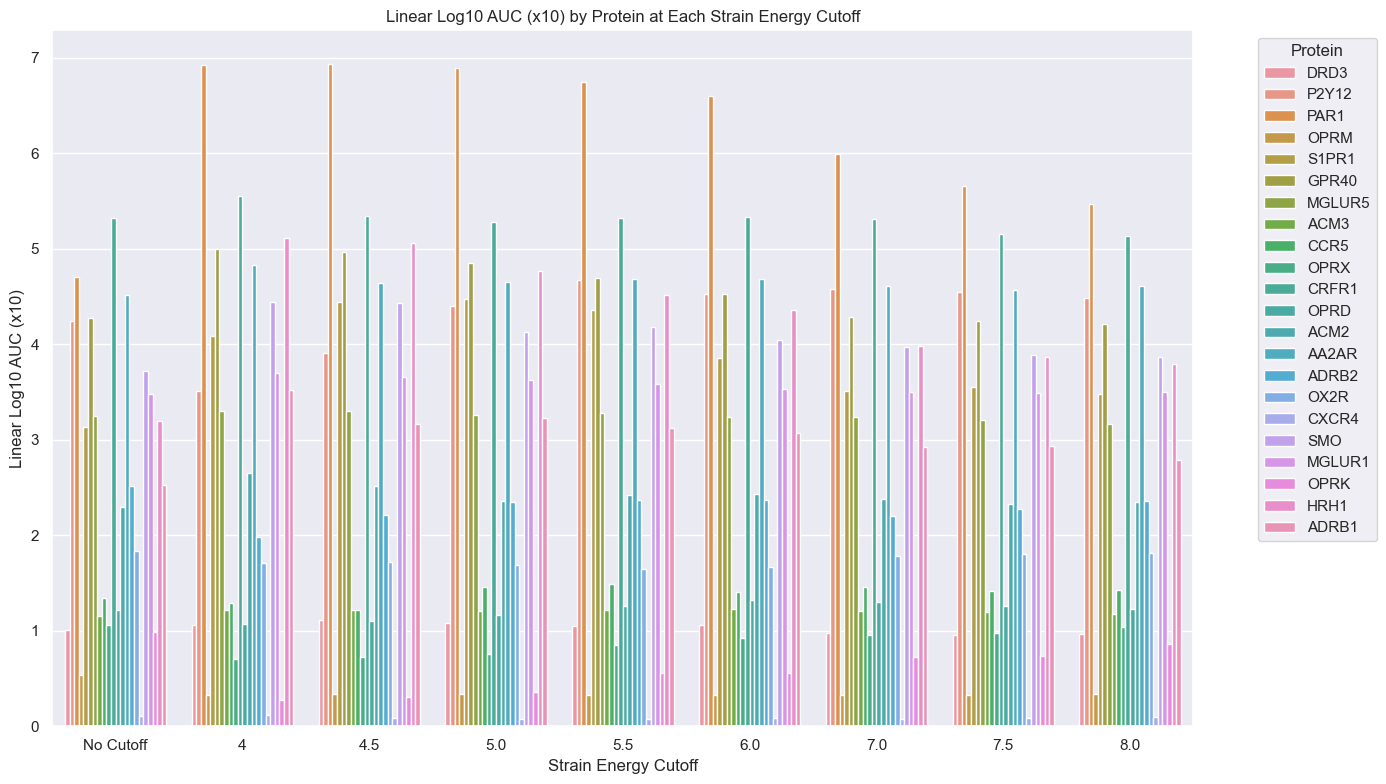

In [11]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(
    data=data,
    x="Strain Energy Cutoff",
    y="Linear Log10 AUC (x10)",
    hue="Protein",
    ci=None,
)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("Linear Log10 AUC (x10)")
plt.title("Linear Log10 AUC (x10) by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_53943/1279366284.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


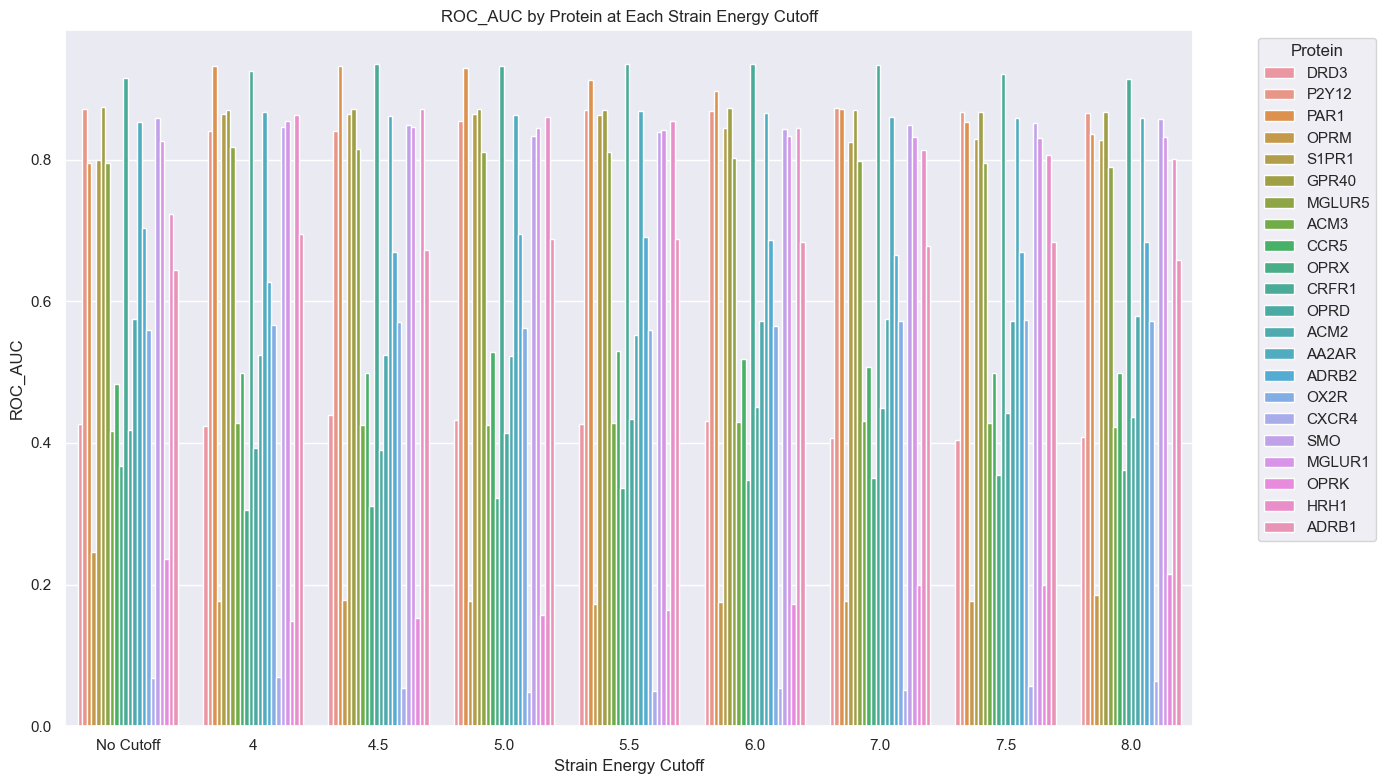

In [16]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for the 'EF1%' metric
ax = sns.barplot(
    data=data,
    x="Strain Energy Cutoff",
    y="ROC_AUC",
    hue="Protein",
    ci=None,
)

# Place the legend outside the plot
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add labels and title
plt.xlabel("Strain Energy Cutoff")
plt.ylabel("ROC_AUC")
plt.title("ROC_AUC by Protein at Each Strain Energy Cutoff")

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
data.columns

Index(['Protein', 'Strain Energy Cutoff', 'EF1%', 'EF5%',
       'Linear Log10 AUC (x10)', 'Delta Linear Log10 AUC (x10)', 'ROC_AUC',
       'Actives', 'Total Count'],
      dtype='object')

# We need to get delta values to baseline and find a way to better represent the proteins as the color map is insufficient 
## probably need box and whisker plots so we can understand the outliers in the averages as well. 
## need input from team re: what to do with pareto
